In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')


In [3]:
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree Function,Age,Prediction
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head(10)

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree Function,Age,Prediction
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
print(df[~df.applymap(np.isreal).all(1)])
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, Pedigree Function, Age, Prediction]
Index: []
Empty DataFrame
Columns: []
Index: []


In [6]:
import seaborn as sns, numpy as np #Let’s Do Some Descriptive #Analysis using
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Prediction,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


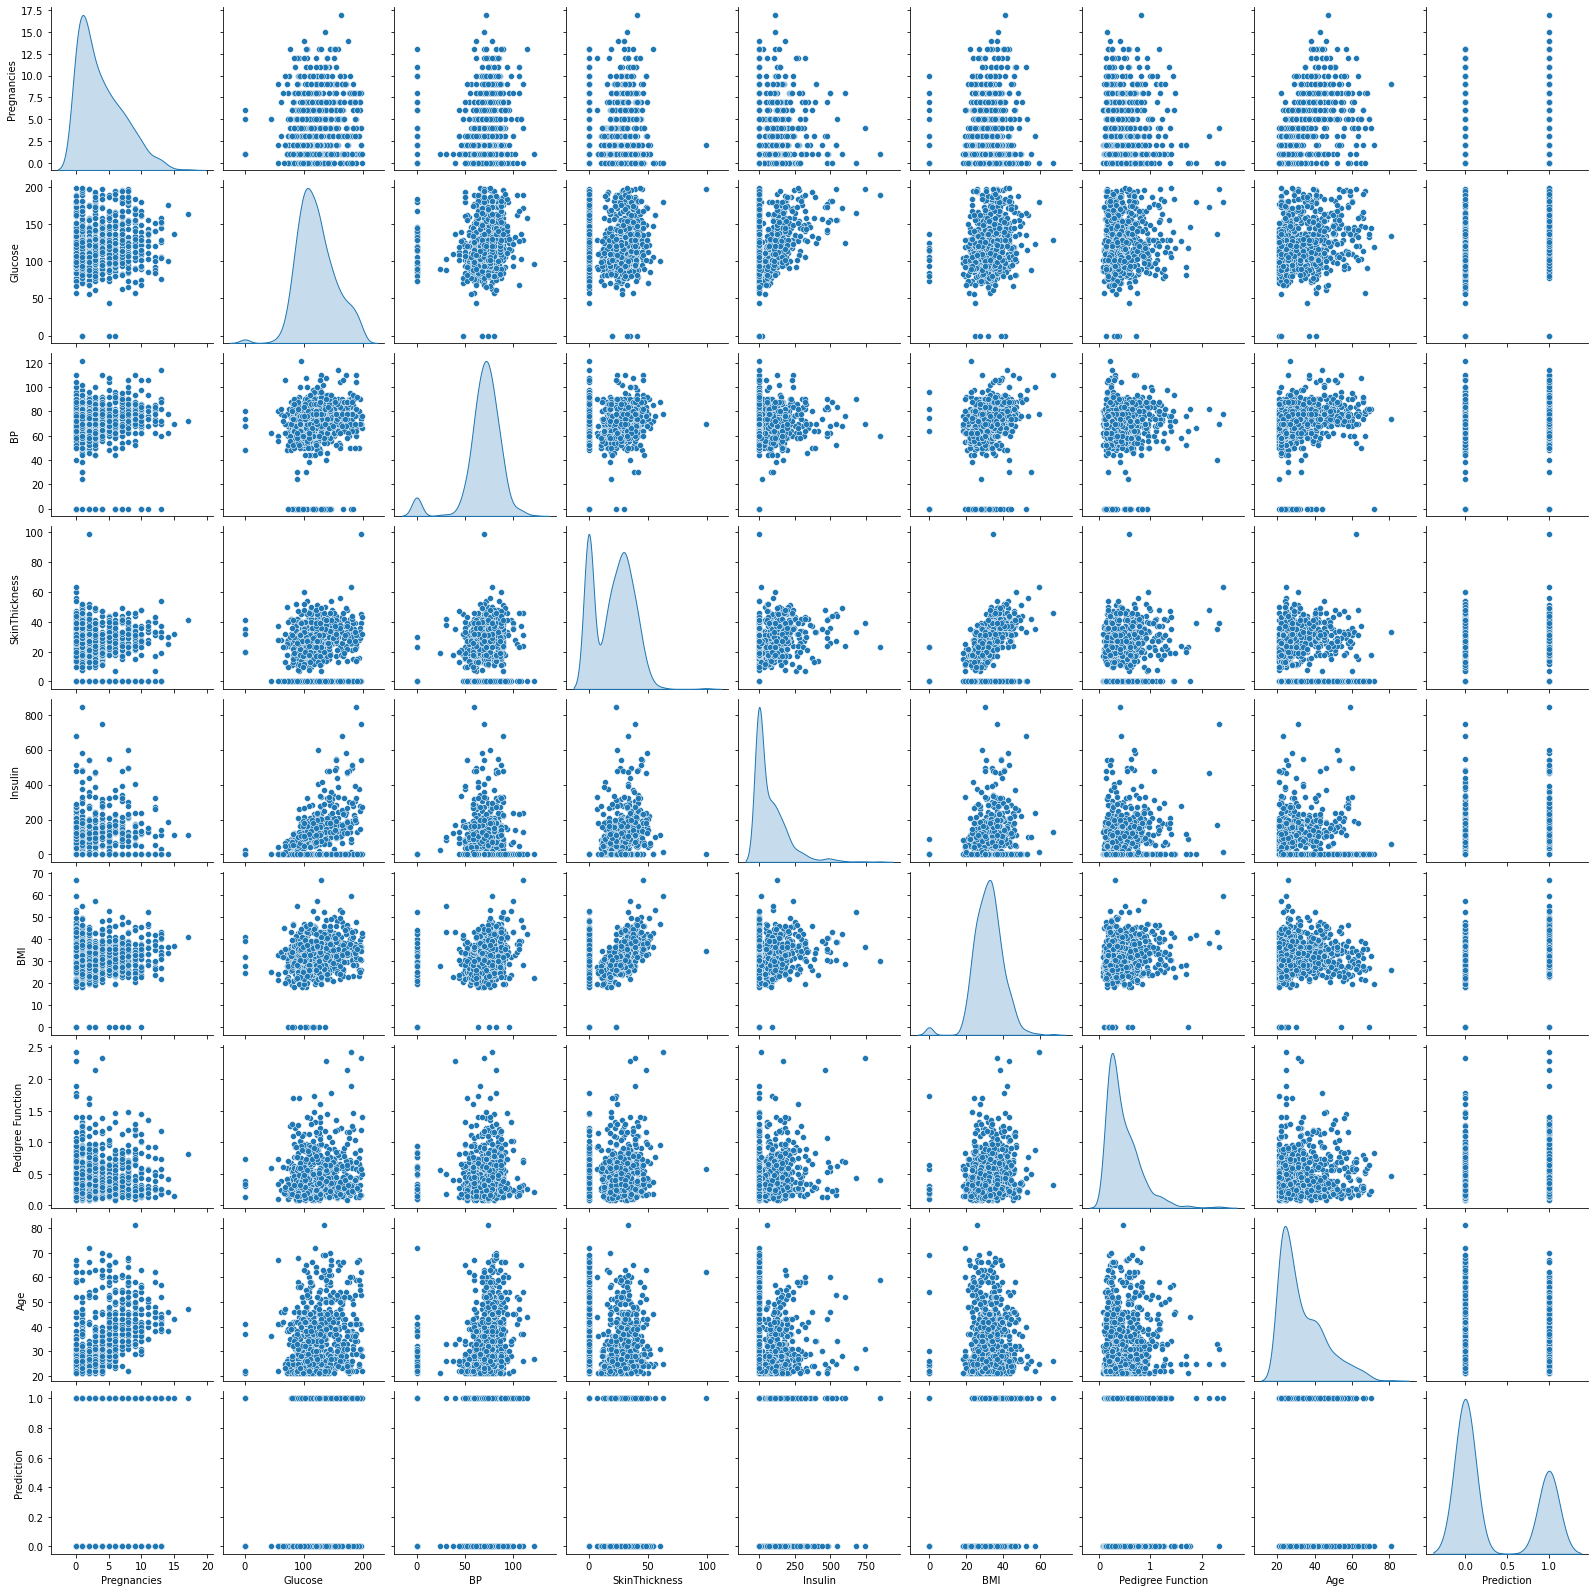

In [7]:
sns.pairplot(df, diag_kind ='kde')

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn import metrics

In [11]:
X=df[['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','Pedigree Function','Age']]

In [12]:
X.shape

(768, 8)

In [13]:
y=df['Prediction']

In [14]:
y.shape

(768,)

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Prediction, Length: 768, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/4,random_state=23)

In [18]:
X_test.size

1536

In [19]:
X_test.shape

(192, 8)

In [20]:
y_train.shape

(576,)

In [21]:
y_test.shape

(192,)

In [22]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)
model_LR.score(X_test,y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8333333333333334

In [23]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS.fit(X_train)

X_train_Scaled=SS.transform(X_train)
X_test_Scaled=SS.transform(X_test)

In [24]:
X_train_Scaled

array([[-0.5466314 , -0.20813064, -0.03324486, ..., -0.39319244,
        -1.19349941, -0.68217105],
       [ 0.937156  , -0.55443203, -0.13675317, ...,  0.93858409,
        -0.41481045, -0.16931851],
       [-0.84338888, -0.4599862 ,  0.07026345, ...,  0.31111246,
        -1.03899764, -0.93859733],
       ...,
       [-0.24987392,  1.86967774, -0.24026148, ...,  0.28550137,
        -0.64038305, -0.59669563],
       [-0.84338888, -0.36554036, -0.55078641, ..., -0.41880352,
        -0.8010649 , -0.93859733],
       [-1.14014636,  2.1215333 ,  0.69131332, ...,  0.0293905 ,
         0.62962157, -0.93859733]])

In [25]:
X_train

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree Function,Age
257,2,114,68,22,0,28.7,0.092,25
48,7,103,66,32,0,39.1,0.344,31
654,1,106,70,28,135,34.2,0.142,22
343,5,122,86,0,0,34.7,0.290,33
538,0,127,80,37,210,36.3,0.804,23
...,...,...,...,...,...,...,...,...
31,3,158,76,36,245,31.6,0.851,28
488,4,99,72,17,0,25.6,0.294,28
40,3,180,64,25,70,34.0,0.271,26
742,1,109,58,18,116,28.5,0.219,22


In [26]:
X_test.shape

(192, 8)

In [27]:
y_predict= model_LR.predict(X_test)

In [28]:
y_predict= model_LR.predict(X_test)

In [29]:
y_predict

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[116,  10],
       [ 22,  44]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

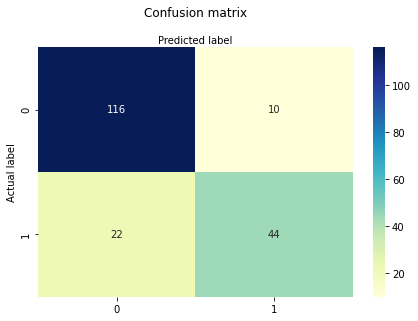

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.8333333333333334
Precision: 0.8148148148148148
Recall: 0.6666666666666666


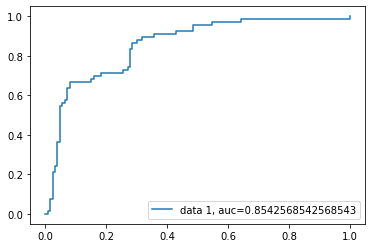

In [33]:
y_pred_proba = model_LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0, 0.5, 'Insulin')

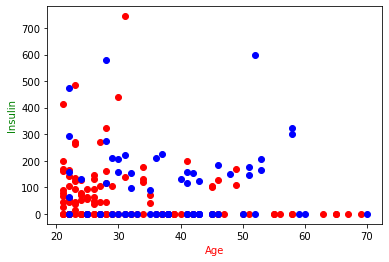

In [34]:
plt.scatter(X_test[y_test==0]['Age'],X_test[y_test==0]['Insulin'],c='r')
plt.scatter(X_test[y_test==1]['Age'],X_test[y_test==1]['Insulin'],c='b')
plt.xlabel('Age',c='r')
plt.ylabel('Insulin', c='g')

Text(0, 0.5, 'Glucose')

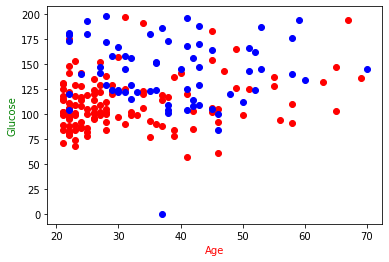

In [35]:
plt.scatter(X_test[y_test==0]['Age'],X_test[y_test==0]['Glucose'],c='r')
plt.scatter(X_test[y_test==1]['Age'],X_test[y_test==1]['Glucose'],c='b')
plt.xlabel('Age',c='r')
plt.ylabel('Glucose', c='g')

Text(0, 0.5, 'Glucose')

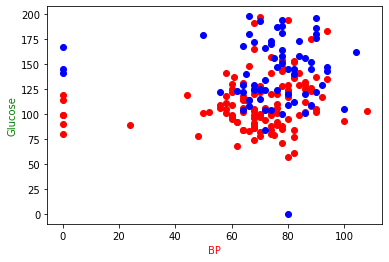

In [36]:
plt.scatter(X_test[y_test==0]['BP'],X_test[y_test==0]['Glucose'],c='r')
plt.scatter(X_test[y_test==1]['BP'],X_test[y_test==1]['Glucose'],c='b')
plt.xlabel('BP',c='r')
plt.ylabel('Glucose', c='g')

Text(0, 0.5, 'BP')

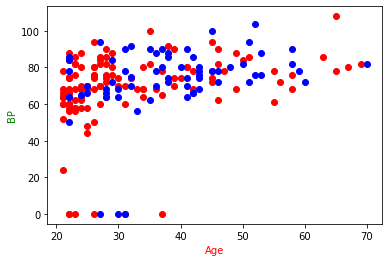

In [37]:
plt.scatter(X_test[y_test==0]['Age'],X_test[y_test==0]['BP'],c='r')
plt.scatter(X_test[y_test==1]['Age'],X_test[y_test==1]['BP'],c='b')
plt.xlabel('Age',c='r')
plt.ylabel('BP', c='g')

Text(0, 0.5, 'Insulin')

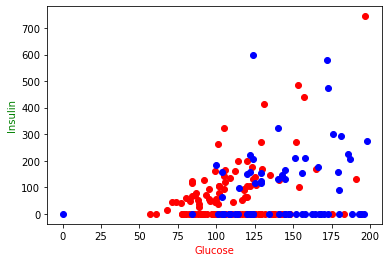

In [38]:
plt.scatter(X_test[y_test==0]['Glucose'],X_test[y_test==0]['Insulin'],c='r')
plt.scatter(X_test[y_test==1]['Glucose'],X_test[y_test==1]['Insulin'],c='b')
plt.xlabel('Glucose',c='r')
plt.ylabel('Insulin', c='g')